# Playing with Coronavirus Timeseries

- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset


## To Do:

- [ ] Add data from Covid Tracking Project's API
    - https://covidtracking.com/api
    
- [ ] Move app styling to a css file in a new `assets/` folder

### RESOURCES FOR FUTURE
- RAFAEL STUDY GROUP FOR MAKING A MAP
    - https://www.youtube.com/watch?v=MAhK7NHXEOg&feature=emb_logo
    - https://github.com/erdosn/additional-topic-plotly

In [1]:
import os,glob,sys
import re

In [2]:
!pip install -U fsds
from fsds.imports import *


Bad key "text.kerning_factor" on line 4 in
/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


fsds v0.2.15 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


```python
## Determine if dataset is downloaded via Kaggle CLI
import os
from zipfile import ZipFile


if DOWNLOAD:
    !pip install kaggle --upgrade

    cmd = 'kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset'
    os.system(cmd)
    print('Downloaded dataset Zipfie, extracting...')
    with ZipFile('novel-corona-virus-2019-dataset.zip') as file:
        file.extractall()
```

# Function-izing Processing

1. `download_coronavirus_data(fpath='New Data/)` 
2. `1oad_raw_df(filepaths[4])`
3. `get_and_clean_US`
4. `set_datetime_index`

### Making a class to contain functions

### def  `download_coronavirus_data`

In [3]:
# @add_method(CoronaData)
def download_coronavirus_data(path='New Data/',verbose=False):
    """Installs the Kaggle Command Line Interface to clone dataset.
    Then extracts dataset to specified path and displays name of main file.
    Args:
        path(str): Folder to extract dataset into (must end with a '/')
        
    Returns:
        file_list(list): List of full filepaths to downloaded csv files.
    """
    ## Determine if dataset is downloaded via Kaggle CL
    import os,glob
    from zipfile import ZipFile
    from IPython.display import clear_output
    os.makedirs(path, exist_ok=True)

    ## Install Kaggle 
    !pip install kaggle --upgrade
    clear_output()
    
    ## Run Kaggle Command 
    cmd = 'kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset'
    os.system(cmd)
    
    ## Extract ZipFile
    print(f'Downloaded dataset Zipfie, extracting to {path}...')
    zip_filepath = 'novel-corona-virus-2019-dataset.zip'
    with ZipFile(zip_filepath) as file:
        file.extractall(path)
    
    ## Delete Zip File
    os.system(f"rm {zip_filepath}"  )
    
    
    ## Get list of all csvs
    print('[i] Extraction Complete.')    
    file_list = glob.glob(path+"*.csv")
    
    
    ## Find main df 
    main_file = [file for file in file_list if 'covid_19_data.csv' in file]
    if verbose:
        print(f"[i] The main file name is {main_file}")
    return main_file[0] #file_list[index]

In [4]:
DOWNLOAD = True

if DOWNLOAD:
    main_file = download_coronavirus_data()
    print('\n\n[i] Success. Downloaded dataset from kaggle...')

else:
    print('Using pre-existing data')

Downloaded dataset Zipfie, extracting to New Data/...
[i] Extraction Complete.


[i] Success. Downloaded dataset from kaggle...


## Main Dataset - Get US States

### def `load_raw_df`

In [5]:
# @add_method(CoronaData)
def load_raw_df(fpath,kws={},verbose=True):
    """Performs most basic of preprocessing, including renaming date column to 
    Date and dropping 'Last Update', and 'SNo' columns"""
    
    ## Default Kws
    read_kws = dict(parse_dates=['ObservationDate','Last Update'])
    
    ## Add User kws
    read_kws = {**read_kws,**kws}
    
    if verbose:
        print(f"[i] Loading {fpath} with read_csv kws:",end='')
        display(read_kws)
        
    df = pd.read_csv(fpath,**read_kws)
    
    ## Drop unwated columns
    df.drop(['Last Update',
             'SNo'],axis=1,inplace=True)

    ## Rename Date columns
    df.rename({'ObservationDate':'Date'},axis=1,inplace=True)
    
    ## Display some info 
    if verbose:
        display(df.head())
        # Countries in the dataset
        print(f"[i] There are {len(df['Country/Region'].unique())} countries in the datatset")
        
        ## Get first and last date
        start_ts = df["Date"].loc[df['Date'].idxmin()].strftime('%m-%d-%Y')
        end_ts = df["Date"].loc[df['Date'].idxmax()].strftime('%m-%d-%Y')
        # DF['Date'].idxmin(), DF['Date'].idxmax()
        print(f"[i] Dates Covered:\n\tFrom {start_ts} to {end_ts}")

    return df

In [6]:
# raw_df = load_raw_df(main_file)

### def `set_datetime_index`

In [7]:
# @add_method(CoronaData)
def set_datetime_index(df_,col='Date'):#,drop_old=False):
    df = df_.copy()
    df[col] = pd.to_datetime(df[col],infer_datetime_format=True)
    df.set_index(df[col],drop=True,inplace=True)
    if col in df.columns:
        df.drop(columns=col,inplace=True)
    return df#, inplace=True)


### 06/27 Adding US Population

In [8]:
# state_url = 'https://raw.githubusercontent.com/jirvingphd/List-of-US-States/master/states.csv'
# state_lookup = pd.read_csv(state_url)

# state_lookup = state_lookup.append({'State':'Puerto Rico','Abbreviation':'PR'},ignore_index=True)

# state_lookup

In [9]:
# state_lookup.to_csv('Reference Data/united_states_abbreviations.csv', index=False)

In [10]:
# abbrev = pd.read_csv('Reference Data/united_states_abbreviations.csv')
# abbrev

In [11]:
# ## Making Master Lookup CSV
# abbrev = pd.read_csv('Reference Data/united_states_abbreviations.csv')
# display(abbrev.head())

In [12]:
# pop = pd.read_csv('Reference Data/us-pop-est2019-alldata.csv')
# pop.head()

In [13]:
# us_pop = pop[['NAME','POPESTIMATE2019']].copy() #.loc[pop['STATE']>0][
# us_pop.head()

In [14]:
# us_info = pd.merge(abbrev,us_pop,right_on='NAME',left_on='State',how="outer")
# # us_info.drop('NAME',axis=1,inplace=True)
# us_info

In [15]:
# us_info.to_csv('Reference Data/_US_state_info_merged.csv',index=False)

### def `load_us_reference_info`

In [16]:
# @add_method(CoronaData)
def load_us_reference_info():
    ## Making Master Lookup CSV
    abbrev = pd.read_csv('Reference Data/united_states_abbreviations.csv')
    pop = pd.read_csv('Reference Data/us-pop-est2019-alldata.csv')
    us_pop = pop.loc[pop['STATE']>0][['NAME','POPESTIMATE2019']].copy()
    us_info = pd.merge(abbrev,us_pop,right_on='NAME',left_on='State',how="inner")
    us_info.drop('NAME',axis=1,inplace=True)
    return us_info

### def  `calculate_per_capita`

In [17]:
# @add_method(CoronaData)
def calculate_per_capita(df_,stat_cols = ['Confirmed','Deaths','Recovered']):
    df = df_.copy()
    ## ADDING PER CAPITA DATA 
    for col in stat_cols:
        df[f"{col} Per Capita"] = df[col]/df['POPESTIMATE2019']
    df.drop('POPESTIMATE2019',axis=1,inplace=True)
    return df

### def `get_and_clean_US`

In [18]:
# @add_method(CoronaData)
def get_and_clean_US(df,save_as = 'Reference Data/united_states_abbreviations.csv',
                     make_date_index=True,per_capita=True):
    """Takes raw df loaded and extracts United States and processes
    all state names to create new abbreviation column 'state'.
    """
    ## Get only US
    df_us = df.groupby('Country/Region').get_group('US').copy() 
    
    # REPLACE STATE NAMES
    # https://raw.githubusercontent.com/jirvingphd/List-of-US-States/master/states.csv
#     try:
#         state_url = 'https://raw.githubusercontent.com/jirvingphd/List-of-US-States/master/states.csv'
#         state_lookup = pd.read_csv(state_url)
#         state_lookup.to_csv(save_as, index=False)
#     except:
#         print('Error downloading state lookup csv. Using local copy')
#         state_lookup.read_csv(save_as)
    state_lookup = load_us_reference_info()

    
    ## Make renaming dict for states
    STATE_DICT = dict(zip(state_lookup['State'],state_lookup['Abbreviation']))
    STATE_DICT.update({'Chicago':'IL',
                      'Puerto Rico':'PR',
                      'Virgin Islands':'VI',
                      'United States Virgin Islands':'VI'})

    ## Separately Process Rows that contain a city, state 
    df_city_states = df_us[df_us['Province/State'].str.contains(',')]
    
    
    ## Finding City Abbreviations in city_states
    import re
    state_expr = re.compile(r"[A-Z\.]{2,4}")
    df_city_states['state'] = df_city_states['Province/State'].apply(state_expr.findall)
    df_city_states = df_city_states.explode('state')


    ## Seperately process Rows that do not contain a city,state
    df_states = df_us[~df_us['Province/State'].str.contains(',')]
    df_states['state'] =  df_states['Province/State'].map(STATE_DICT)

    ## Combining data frame back together
    df = pd.concat([df_states,df_city_states]).sort_index()
    df = df.dropna(subset=['state'])
    
    ## Fix some stragglers (like D.C. vs DC)
    df['state'] = df['state'].replace('D.C.','DC')
    
    ## Add Population Data
    df = pd.merge(df, state_lookup,left_on='state',right_on="Abbreviation")
    
    if per_capita:

        for col in  ['Confirmed','Deaths','Recovered']:
            df[f"{col} Per Capita"] = df[col]/df['POPESTIMATE2019']
            
            ## Remove Population 
        df.drop('POPESTIMATE2019',axis=1,inplace=True)
#     if len(save_as)>0:
#         print(f'[i] Saving final df as {save_as}')
#         df.to_csv(save_as,index=False)
        
    if make_date_index:
        df = set_datetime_index(df)
    return df

In [19]:
state_lookup = load_us_reference_info()
state_lookup.head()

,State,Abbreviation,POPESTIMATE2019
0,Alabama,AL,4903185
1,Alaska,AK,731545
2,Arizona,AZ,7278717
3,Arkansas,AR,3017804
4,California,CA,39512223


### `def get_state_ts`

In [20]:
def get_state_ts(df, state_name,
                     group_col='state', ts_col=None,
                     freq='D', agg_func='sum'):
    """Take df_us and extracts state's data as then Freq/Aggregation provided"""
    
    ## Get state_df group
    state_df = df.groupby(group_col).get_group(state_name)#.resample(freq).agg(agg)
    
    ## Resample and aggregate state data
    state_df = state_df.resample(freq).agg(agg_func)
    
    
    ## Get and Rename Sum Cols 
    orig_cols = state_df.columns

    ## Create Renamed Sum columns
    for col in orig_cols:
        state_df[f"{state_name} - {col}"] = state_df[col]
      
    ## Drop original cols
    state_df.drop(orig_cols,axis=1,inplace=True)
    
    if ts_col is not None:
        ts_cols_selected = [col for col in state_df.columns if ts_col in col]
        state_df = state_df[ts_cols_selected]

    return state_df

In [21]:
# df = get_and_clean_US(raw_df)
# df

### Testing workflow so far

In [22]:
main_file = download_coronavirus_data()
raw_df = load_raw_df(main_file)
df = get_and_clean_US(raw_df)
display(df.head()) 
NY = get_state_ts(df,'NY')
NY.head()

Downloaded dataset Zipfie, extracting to New Data/...
[i] Extraction Complete.
[i] Loading New Data/covid_19_data.csv with read_csv kws:

{'parse_dates': ['ObservationDate', 'Last Update']}

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


[i] There are 223 countries in the datatset
[i] Dates Covered:
	From 01-22-2020 to 06-28-2020


,Province/State,Country/Region,Confirmed,Deaths,Recovered,state,State,Abbreviation,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
Date,,,,,,,,,,,
2020-01-22,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.0,0.0
2020-01-23,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.0,0.0
2020-01-24,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.0,0.0
2020-01-25,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.0,0.0
2020-01-26,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.0,0.0


,NY - Confirmed,NY - Deaths,NY - Recovered,NY - Confirmed Per Capita,NY - Deaths Per Capita,NY - Recovered Per Capita
Date,,,,,,
2020-03-02,1.0,0.0,0.0,5.140447e-08,0.0,0.0
2020-03-03,2.0,0.0,0.0,1.028089e-07,0.0,0.0
2020-03-04,11.0,0.0,0.0,5.654492e-07,0.0,0.0
2020-03-05,23.0,0.0,0.0,1.182303e-06,0.0,0.0
2020-03-06,36.0,0.0,0.0,1.850561e-06,0.0,0.0


# class `CoronaData`

In [23]:
def add_method(cls):
    from functools import wraps # This convenience func preserves name and docstring

    """source=https://medium.com/@mgarod/dynamically-add-a-method-to-a-class-in-python-c49204b85bd6"""
    def decorator(func):
        @wraps(func) 
        def wrapper(self, *args, **kwargs): 
            return func(*args, **kwargs)
        setattr(cls, func.__name__, wrapper)
        # Note we are not binding func, but wrapper which accepts self but does exactly the same as func
        return func # returning func means func can still be used normally
    return decorator


In [24]:
class CoronaData(object):

    def __init__(self,data_dir='New Data/',run_workflow=True,
                 download=False,load_data=True,verbose=True):
        self.__download = download
        self.__verbose = verbose
        self._data_folder = data_dir
        
        ## Download data or set local filepath
        if download:
            self.download_coronavirus_data(verbose=verbose)
        else:
            self.get_data_fpath(data_dir)
        
        ## Load df_raw and df
        if load_data:
            self.load_raw_df(verbose=verbose)
            
        if run_workflow:
            self.get_and_clean_US()
            self._make_state_dict()
            print('Full Worfklow Complete.')
            

    # @add_method(CoronaData)
    def download_coronavirus_data(self,path=None,verbose=None):
        """Installs the Kaggle Command Line Interface to clone dataset.
        Then extracts dataset to specified path and displays name of main file.
        Args:
            path(str): Folder to extract dataset into (must end with a '/')

        Returns:
            file_list(list): List of full filepaths to downloaded csv files.
        """        
        if verbose==None:
            verbose = self.__verbose
        print('[i] DOWNLOADING DATA USING KAGGLE API')
        if path is None:
            path = self._data_folder
                                  
        ## Determine if dataset is downloaded via Kaggle CL
        import os,glob
        from zipfile import ZipFile
        from IPython.display import clear_output
        os.makedirs(path, exist_ok=True)

        try:
            import kaggle
        except:
            ## Install Kaggle 
            !pip install kaggle --upgrade
            clear_output()
            if verbose: print('- Installed kaggle command line tool.')

        ## Run Kaggle Command 
        cmd = 'kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset'
        os.system(cmd)

        ## Extract ZipFile
        print(f'Downloaded dataset Zipfie, extracting to {path}...')
        zip_filepath = 'novel-corona-virus-2019-dataset.zip'
        with ZipFile(zip_filepath) as file:
            file.extractall(path)
        
        ## Delete Zip File
        os.system(f"rm {zip_filepath}"  )
            
        self.get_data_fpath(path)

        
    def get_data_fpath(self,path):
        """save self._file_list and self._main_file"""
        import glob
        verbose = self.__verbose
        ## Get list of all csvs
        if verbose: print('[i] Extraction Complete.')    
        file_list = glob.glob(path+"*.csv")

        ## Find main df 
        main_file = [file for file in file_list if 'covid_19_data.csv' in file]
        if verbose: print(f"[i] The main file name is {main_file}")
            
        self._file_list = file_list
        self._main_file = main_file[0]
    
    
    
    def load_raw_df(self,fpath=None,kws={},verbose=True):
        """Performs most basic of preprocessing, including renaming date column to 
        Date and dropping 'Last Update', and 'SNo' columns"""
        import pandas as pd
        if fpath is None:
            fpath = self._main_file

        ## Default Kws
        read_kws = dict(parse_dates=['ObservationDate','Last Update'])

        ## Add User kws
        read_kws = {**read_kws,**kws}

        if verbose:
            print(f"[i] Loading {fpath} with read_csv kws:",end='')
            display(read_kws)

        df = pd.read_csv(fpath,**read_kws)
        
        self.df_raw = df.copy()
        ## Drop unwated columns
        df.drop(['Last Update',
                 'SNo'],axis=1,inplace=True)
        

        ## Rename Date columns
        df.rename({'ObservationDate':'Date'},axis=1,inplace=True)

        ## Display some info 
        if verbose:
            display(df.head())
            # Countries in the dataset
            print(f"[i] There are "+str(len(df['Country/Region'].unique()))+" countries in the datatset")

            ## Get first and last date
            start_ts = df["Date"].loc[df['Date'].idxmin()].strftime('%m-%d-%Y')
            end_ts = df["Date"].loc[df['Date'].idxmax()].strftime('%m-%d-%Y')
            # DF['Date'].idxmin(), DF['Date'].idxmax()
            print(f"[i] Dates Covered:\n\tFrom {start_ts} to {end_ts}")
                  

        self.df = df
        
    
    def set_datetime_index(self,df_=None,col='Date'):#,drop_old=False):
        """Returns df with specified column as datetime index"""
        import pandas as pd

        if df_ is None:
            df_ = self.df
            
        df = df_.copy()
        df[col] = pd.to_datetime(df[col],infer_datetime_format=True)
        df.set_index(df[col],drop=True,inplace=True)
        if col in df.columns:
            df.drop(columns=col,inplace=True)
        return df#, inplace=True)
    
    
    
    def load_us_reference_info(self):
        """Return and save US Reference Data"""
        ## Making Master Lookup CSV
        import pandas as pd
        abbrev = pd.read_csv('Reference Data/united_states_abbreviations.csv')
        pop = pd.read_csv('Reference Data/us-pop-est2019-alldata.csv')
        us_pop = pop.loc[pop['STATE']>0][['NAME','POPESTIMATE2019']].copy()
        us_info = pd.merge(abbrev,us_pop,right_on='NAME',left_on='State',how="inner")
        us_info.drop('NAME',axis=1,inplace=True)
        self.reference_data = us_info
        return us_info
    
    
    def calculate_per_capita(self,df_=None,stat_cols = ['Confirmed','Deaths','Recovered']):
        """Calculate Per Capita columns"""
        if df_ is None:
            df_ = self.df
            
        df = df_.copy()
        
        if 'POPESTIMATE2019' in df.columns==False:
            self.load_us_reference_info()
            
        ## ADDING PER CAPITA DATA 
        for col in stat_cols:
            df[f"{col} Per Capita"] = df[col]/df['POPESTIMATE2019']
        df.drop('POPESTIMATE2019',axis=1,inplace=True)
        return df    

    
    def get_and_clean_US(self,df=None,#save_as = 'Reference Data/united_states_abbreviations.csv',
                         make_date_index=True,per_capita=True):
        """Takes raw df loaded and extracts United States and processes
        all state names to create new abbreviation column 'state'.
        """
        import pandas as pd
        if df is None:
            df= self.df
            
        ## Get only US
        df_us = df.groupby('Country/Region').get_group('US').copy() 


        state_lookup = self.load_us_reference_info()


        ## Make renaming dict for states
        STATE_DICT = dict(zip(state_lookup['State'],state_lookup['Abbreviation']))
        STATE_DICT.update({'Chicago':'IL',
                          'Puerto Rico':'PR',
                          'Virgin Islands':'VI',
                          'United States Virgin Islands':'VI'})

        ## Separately Process Rows that contain a city, state 
        df_city_states = df_us[df_us['Province/State'].str.contains(',')]


        ## Finding City Abbreviations in city_states
        import re
        state_expr = re.compile(r"[A-Z\.]{2,4}")
        df_city_states['state'] = df_city_states['Province/State'].apply(state_expr.findall)
        df_city_states = df_city_states.explode('state')


        ## Seperately process Rows that do not contain a city,state
        df_states = df_us[~df_us['Province/State'].str.contains(',')]
        df_states['state'] =  df_states['Province/State'].map(STATE_DICT)

        ## Combining data frame back together
        df = pd.concat([df_states,df_city_states]).sort_index()
        df = df.dropna(subset=['state'])

        ## Fix some stragglers (like D.C. vs DC)
        df['state'] = df['state'].replace('D.C.','DC')

        
        ## Combine Cleaned Data 
        df = pd.merge(df, state_lookup,left_on='state',right_on="Abbreviation")
       
    
        ## Add Population Data
        if per_capita:

            for col in  ['Confirmed','Deaths','Recovered']:
                df[f"{col} Per Capita"] = df[col]/df['POPESTIMATE2019']

                ## Remove Population 
            df.drop('POPESTIMATE2019',axis=1,inplace=True)
    #     if len(save_as)>0:
    #         print(f'[i] Saving final df as {save_as}')
    #         df.to_csv(save_as,index=False)

        if make_date_index:
            df = self.set_datetime_index(df)
        
        self.df_us = df.copy()
        return df
    
    
    def get_state_ts(self,state_name,df=None,
                     group_col='state', ts_col=None,
                     freq='D', agg_func='sum'):
        """Take df_us and extracts state's data as then Freq/Aggregation provided"""
        ## 
        if df is None:
            df = self.df_us
            
            
        ## Get state_df group
        state_df = df.groupby(group_col).get_group(state_name)#.resample(freq).agg(agg)

        ## Resample and aggregate state data
        state_df = state_df.resample(freq).agg(agg_func)


        ## Get and Rename Sum Cols 
        orig_cols = state_df.columns

        ## Create Renamed Sum columns
        for col in orig_cols:
            state_df[f"{state_name} - {col}"] = state_df[col]

        ## Drop original cols
        state_df.drop(orig_cols,axis=1,inplace=True)

        if ts_col is not None:
            ts_cols_selected = [col for col in state_df.columns if ts_col in col]
            state_df = state_df[ts_cols_selected]

        return state_df 

    
    def _make_state_dict(self,df=None,col='state'):
        if df is None:
            df = self.df_us
        elif col not in df.columns:
            msg = f"{col} not in df.columns.\nColumns include:"+'\n'.join(df.columns)
            raise Exception(msg)
        state_list=df['state'].unique()

        STATES = {}
        for state in state_list:
            STATES[state] = self.get_state_ts(state)
        self.STATES = STATES

        
    ### CLASS DISPLAY RELATED ITEMS
    def _self_report(self,private=False,methods=True,attributes=True):
        import inspect
        attr_list = inspect.getmembers(self)
        dashes='---'*20
        report = [dashes]
        report.append("[i] CoronaData Contents:\n"+dashes)


        method_list=["METHODS:"]
        attribute_list=["ATTRIBUTES"]
        workflow_list = ["WORKFLOW:"]
        
        if private==False:
            startswithcheck = '_'
        else:
            startswithcheck ='__'
        
        ## Loop through all attr
        for item in attr_list:
            item_name = item[0]
            
            ## Exclude Private/Special Attrs
            if item_name.startswith(startswithcheck)== False:
                
                ## Get tf if item is method
                method_check = inspect.ismethod(item[1])
                
                ## If item is a method:
                if method_check==True:
                    method_list.append(item_name)
                ## If item is an attribute
                else: 
                    attribute_list.append(item_name) 
                    
                    
        ## Get workflow
        workflow_funcs = [self.download_coronavirus_data,
                         self.load_raw_df, self.get_and_clean_US]
        for i,method in enumerate(workflow_funcs):
            workflow_list.append(f"{i+1}. {method.__name__}")
            
#         [workflow_list.append(method.__name__) for method in workflow_funcs]
#         print(workflow)
#         workflow_list.extend(workflow_funcs)

        report.append('\n\t'.join(workflow_list))
        
        
        if methods:
            report.append('\n\t'.join(method_list))
        if attributes:
            report.append('\n\t'.join(attribute_list))
            

        
        return '\n'.join(report)
    
    
    

                
    def __repr__(self):
#         display(help(self))
    
        return self._self_report()#('\n'.join(self._method_report()))
        

In [25]:
corona = CoronaData(verbose=False)
corona
# corona.download_coronavirus_data()

Full Worfklow Complete.


------------------------------------------------------------
[i] CoronaData Contents:
------------------------------------------------------------
WORKFLOW:
	1. download_coronavirus_data
	2. load_raw_df
	3. get_and_clean_US
METHODS:
	calculate_per_capita
	download_coronavirus_data
	get_and_clean_US
	get_data_fpath
	get_state_ts
	load_raw_df
	load_us_reference_info
	set_datetime_index
ATTRIBUTES
	STATES
	df
	df_raw
	df_us
	reference_data

In [26]:
corona.df_us

,Province/State,Country/Region,Confirmed,Deaths,Recovered,state,State,Abbreviation,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
Date,,,,,,,,,,,
2020-01-22,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
2020-01-23,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
2020-01-24,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
2020-01-25,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
2020-01-26,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,Puerto Rico,US,6820.0,149.0,0.0,PR,Puerto Rico,PR,2.135458e-03,0.000047,0.0
2020-06-25,Puerto Rico,US,6877.0,151.0,0.0,PR,Puerto Rico,PR,2.153306e-03,0.000047,0.0
2020-06-26,Puerto Rico,US,6922.0,151.0,0.0,PR,Puerto Rico,PR,2.167396e-03,0.000047,0.0


## Counts by State

In [27]:
## Report Total Cases
total_cases = df.groupby('state').sum()
total_cases.sort_values('Confirmed',0,0).head(20).style.bar(['Deaths','Confirmed'])

,Confirmed,Deaths,Recovered,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
state,,,,,,
NY,28155786.000000,2124762.000000,0.000000,1.447333,0.109222,0.000000
NJ,11419034.000000,773020.000000,2.000000,1.285610,0.087030,0.000000
CA,7807823.000000,272307.000000,76.000000,0.197605,0.006892,0.000002
IL,7356939.000000,333328.000000,76.000000,0.580575,0.026305,0.000006
MA,6540313.000000,426276.000000,19.000000,0.948902,0.061846,0.000003
PA,5168006.000000,336891.000000,0.000000,0.403688,0.026316,0.000000
TX,4678659.000000,108482.000000,0.000000,0.161356,0.003741,0.000000
FL,4437306.000000,162220.000000,0.000000,0.206600,0.007553,0.000000
MI,4250401.000000,376105.000000,5.000000,0.425599,0.037660,0.000001


In [28]:
# df.groupby('state').resample('d').sum()

In [29]:
# ### Get daily stats by state
# df2= df.groupby('state').resample('d').sum()
# df2

In [30]:
# df.groupby(['state','Date']).resample("D").sum()

In [31]:
# df.index

In [32]:
# state_df = df.groupby('state').get_group('NY').resample('D').sum()
# state_df[[col for col in state_df.columns if 'Per Capita' in col]].plot()

In [33]:
# ## RUN FULL WORKFLOW
# main_file = download_coronavirus_data()
# raw_df = load_raw_df(main_file)
# df = get_and_clean_US(raw_df)
# df.head()
corona_data = CoronaData(run_workflow=True,verbose=False)
df = corona_data.df_us
df

Full Worfklow Complete.


,Province/State,Country/Region,Confirmed,Deaths,Recovered,state,State,Abbreviation,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
Date,,,,,,,,,,,
2020-01-22,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
2020-01-23,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
2020-01-24,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
2020-01-25,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
2020-01-26,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,Puerto Rico,US,6820.0,149.0,0.0,PR,Puerto Rico,PR,2.135458e-03,0.000047,0.0
2020-06-25,Puerto Rico,US,6877.0,151.0,0.0,PR,Puerto Rico,PR,2.153306e-03,0.000047,0.0
2020-06-26,Puerto Rico,US,6922.0,151.0,0.0,PR,Puerto Rico,PR,2.167396e-03,0.000047,0.0


In [34]:
state_df = get_state_ts(df,"NY")
state_df

,NY - Confirmed,NY - Deaths,NY - Recovered,NY - Confirmed Per Capita,NY - Deaths Per Capita,NY - Recovered Per Capita
Date,,,,,,
2020-03-02,1.0,0.0,0.0,5.140447e-08,0.000000,0.0
2020-03-03,2.0,0.0,0.0,1.028089e-07,0.000000,0.0
2020-03-04,11.0,0.0,0.0,5.654492e-07,0.000000,0.0
2020-03-05,23.0,0.0,0.0,1.182303e-06,0.000000,0.0
2020-03-06,36.0,0.0,0.0,1.850561e-06,0.000000,0.0
...,...,...,...,...,...,...
2020-06-24,389666.0,31257.0,0.0,2.003057e-02,0.001607,0.0
2020-06-25,390415.0,31301.0,0.0,2.006908e-02,0.001609,0.0
2020-06-26,391220.0,31342.0,0.0,2.011046e-02,0.001611,0.0


#### Need to decide what form to leave df in for plotting functions

In [35]:
# def get_state_ts(df, state_name,
#                  group_col='state',
#                  ts_col=None,resample=False,agg='sum',dt_index='Date'):#, ts_col='Cases'):
#     """"Separates a state_name/group from the group_col of df
#     Returns a resampled aggregate timeseries"""
    
#     ts = df.groupby(group_col).get_group(state_name)
    
#     # ts.set_index('date',inplace=True)
#     ts = ts.reset_index(drop=False).set_index(dt_index)
    
#     if resample:
#         ts = ts.resample('d').agg(agg)
#         ts['state'] = state_name
        
#     ## Return specific columns if specificed
#     if ts_col is not None:
#         return ts[ts_col]#.rename(f"{ts_col.name}-{state_name}")
#     else:
#         return ts

In [36]:
    
# ts_NY = get_state_ts(df,'NY',
#                   ts_col=['Confirmed',"Deaths","Recovered"],resample=True)
# display(ts_NY.head())
# for col in['Confirmed','Deaths','Recovered']:
#     ts_NY[col+'-Cumulative'] = ts_NY[col].cumsum()
# NY = ts_NY.reset_index()
# NY

In [37]:
# import plotly.express as px
# px.line(NY,x='Day',y='Confirmed-Cumulative')
# px.line(NY,x='Day',y='Confirmed')

In [38]:
# get_state_ts(df,'NY',ts_col='Confirmed')#.plot()

### Get all states in a dict

In [39]:
state_list=df['state'].unique()
print(len(state_list))
state_list

52


array(['WA', 'IL', 'CA', 'AZ', 'MA', 'WI', 'TX', 'NE', 'OR', 'RI', 'NH',
       'FL', 'NY', 'GA', 'NC', 'NJ', 'NV', 'TN', 'MD', 'CO', 'PA', 'KY',
       'IN', 'MN', 'CT', 'SC', 'UT', 'HI', 'OK', 'VA', 'DC', 'KS', 'MO',
       'VT', 'IA', 'LA', 'OH', 'AK', 'AR', 'DE', 'ID', 'ME', 'MI', 'MS',
       'MT', 'NM', 'ND', 'SD', 'WV', 'WY', 'AL', 'PR'], dtype=object)

In [40]:
state_list=df['state'].unique()

STATES = {}
for state in state_list:
    STATES[state] = get_state_ts(df,state)

STATES.keys()

dict_keys(['WA', 'IL', 'CA', 'AZ', 'MA', 'WI', 'TX', 'NE', 'OR', 'RI', 'NH', 'FL', 'NY', 'GA', 'NC', 'NJ', 'NV', 'TN', 'MD', 'CO', 'PA', 'KY', 'IN', 'MN', 'CT', 'SC', 'UT', 'HI', 'OK', 'VA', 'DC', 'KS', 'MO', 'VT', 'IA', 'LA', 'OH', 'AK', 'AR', 'DE', 'ID', 'ME', 'MI', 'MS', 'MT', 'NM', 'ND', 'SD', 'WV', 'WY', 'AL', 'PR'])

In [41]:
# !pip install -U plotly
display(STATES['MD'].head())


,MD - Confirmed,MD - Deaths,MD - Recovered,MD - Confirmed Per Capita,MD - Deaths Per Capita,MD - Recovered Per Capita
Date,,,,,,
2020-03-06,3.0,0.0,0.0,4.962221e-07,0.0,0.0
2020-03-07,3.0,0.0,0.0,4.962221e-07,0.0,0.0
2020-03-08,5.0,0.0,0.0,8.270368e-07,0.0,0.0
2020-03-09,5.0,0.0,0.0,8.270368e-07,0.0,0.0
2020-03-10,8.0,0.0,0.0,1.323259e-06,0.0,0.0


### Plot selected states and columns

In [42]:
### Define states and columns to plot
plot_states = ['NY','MD','CA']
plot_cols = ['Confirmed']


## Make empty list for states to concat
concat_dfs = []

# Grab each state's df
for state in plot_states:
    dfs = STATES[state]
    
    ## for each plot_cols, find all columns that contain that col name
    for plot_col in plot_cols:
        concat_dfs.append(dfs[[col for col in dfs.columns if plot_col in col]])

        
## Concatenate final dfs
plot_df = pd.concat(concat_dfs,axis=1)#[STATES[s] for s in plot_states],axis=1).iplot()

## Plot concatenated dfs
pfig = plot_df.iplot(theme='solar',asFigure=True)
pfig

In [43]:
df

,Province/State,Country/Region,Confirmed,Deaths,Recovered,state,State,Abbreviation,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
Date,,,,,,,,,,,
2020-01-22,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
2020-01-23,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
2020-01-24,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
2020-01-25,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
2020-01-26,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,Puerto Rico,US,6820.0,149.0,0.0,PR,Puerto Rico,PR,2.135458e-03,0.000047,0.0
2020-06-25,Puerto Rico,US,6877.0,151.0,0.0,PR,Puerto Rico,PR,2.153306e-03,0.000047,0.0
2020-06-26,Puerto Rico,US,6922.0,151.0,0.0,PR,Puerto Rico,PR,2.167396e-03,0.000047,0.0


# DASHBOARD FUNCTIONS & APP [06/28/20]

**DASHBOARD FEATURES**
- Current Features:
    - Plotly Time Series Plot for US States
    
- TO DO Features:
    - Plotly Map of Cases by State/Zipcode

        - Time Series Plot by Zipcode

**FOR PLOTTING:**
- Need a plotly function that will allow for choices of data to display
- Plotting Function options:
    - Type of Cases: 
        - (confirmed, deaths,recovered)
        - Per Capita versions of above
    - Display New Cases or Cumulative Cases
    - 

### Dashboard Functions

### def `plot_states`

In [44]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go


def plot_states(df, state_list, plot_cols = ['Confirmed'],df_only=False,
                new_only=False,plot_scatter=True,show=False):
    """Plots the plot_cols for every state in state_list.
    Returns plotly figure
    New as of 06/21"""
    
    ## Get state dataframes
    concat_dfs = []  
    STATES = {}
    
    ## Get each state
    for state in state_list:

        # Grab each state's df and save to STATES
        dfs = get_state_ts(df,state)
        STATES[state] = dfs

        ## for each plot_cols, find all columns that contain that col name
        for plot_col in plot_cols:
            concat_dfs.append(dfs[[col for col in dfs.columns if col.endswith(plot_col)]])#plot_col in col]])

    ## Concatenate final dfs
    plot_df = pd.concat(concat_dfs,axis=1)#[STATES[s] for s in plot_states],axis=1).iplot()
    
    
    ## Set title and df if new_only
    if new_only:
        plot_df = plot_df.diff()
        title = "Coronavirus Cases by State - New Cases"
    else:
        title = 'Coronavirus Cases by State - Cumulative'
    
    ## Reset Indes
    plot_df.reset_index(inplace=True)
    
    ## Return Df or plot
    if df_only==False:

        if np.any(['per capita' in x.lower() for x in plot_cols]):
            value_name = "# of Cases - Per Capita"
        else:
            value_name='# of Cases'
        pfig_df_melt = plot_df.melt(id_vars=['Date'],var_name='State',
                                    value_name=value_name)
        
        if plot_scatter:
            plot_func = px.scatter
        else:
            plot_func = px.line
        # Plot concatenated dfs
        pfig = plot_func(pfig_df_melt,x='Date',y=value_name,color='State',
                      width=800,height=500,title=title)
        
#         pfig.update_xaxes(rangeslider_visible=True)

                # Add range slider
        pfig.update_layout(
            xaxis=dict(
                rangeselector=dict(
                    buttons=list([
                        dict(count=7,
                             label="1week",
                             step="day",
                             stepmode="backward"),
                        dict(count=14,
                             label="2weeks",
                             step="day",
                             stepmode="backward"),
                        dict(count=1,
                             label="1m",
                             step="month",
                             stepmode="backward"),
                        dict(count=6,
                             label="6m",
                             step="month",
                             stepmode="backward"),

                        dict(step="all")
                    ])
                ),
                rangeslider=dict(
                    visible=True
                ),
                type="date"
            )
        )
        
        if show:
            pfig.show()
            
        return pfig
    else:
        return plot_df#.reset_index()
    

In [45]:
## Using Function
pfig = plot_states(df,['NY','MD','KY','CA','FL','MA','DC','VA'],
                  plot_cols=['Confirmed'],plot_scatter=True)#,new_only=True)#,df_only=True)
pfig

In [46]:
# ## Using Function
# pfig = plot_states(df,['NY','MD','KY','CA','FL','MA','DC','VA'],
#                   plot_cols=['Confirmed','Deaths'],df_only=True)
# pfig.melt(id_vars=['Date'],var_name='State',
#                                     value_name='# of Cases')
        # Plot concatenated dfs


# pfig_df = plot_states(df,['NY','MD','DC','CA','FL','TX'],
#                       plot_cols=['Confirmed'],
#                       df_only=True)
# # display(pfig_df.head(5)) 

# pfig_df.diff()

# pfig_df_melt = pfig_df.melt(id_vars=['Date'],var_name='State',value_name='# of Cases')
# pfig_df_melt

# pfig = px.scatter(pfig_df_melt,x='Date',y='# of Cases',color='State')
# pfig

# pfig_df = plot_states(df,['NY','MD','KY','CA','FL'],plot_cols=['Confirmed','Deaths'],
          
#                       df_only=True)
# pfig_df.head()

## Dashboard

### Load Dashboard Data

In [47]:
## RUN FULL WORKFLOW
corona_data = CoronaData(verbose=False,run_workflow=True)
df = corona_data.df_us.copy()
df.head()

Full Worfklow Complete.


,Province/State,Country/Region,Confirmed,Deaths,Recovered,state,State,Abbreviation,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
Date,,,,,,,,,,,
2020-01-22,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.0,0.0
2020-01-23,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.0,0.0
2020-01-24,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.0,0.0
2020-01-25,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.0,0.0
2020-01-26,Washington,US,1.0,0.0,0.0,WA,Washington,WA,1.313216e-07,0.0,0.0


### JupyterDash app

In [48]:
try:
    from jupyter_dash import JupyterDash
except:
    %conda install -c conda-forge -c plotly jupyter-dash
    from jupyter_dash import JupyterDash

## IMPORTS
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go


import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


def make_options(menu_choices):
    """Returns list of dictionary with {'label':menu_choice,'value':menu_choice}"""
    options = []
    for choice in menu_choices:
        options.append({'label':choice,'value':choice})
    return options

## Make Plot Cols list for options
stat_cols = ['Confirmed','Deaths','Recovered']
plot_cols = []
for column in stat_cols:
    plot_cols.extend([col for col in df.columns if column in col])

new_options = [{'label':'New Cases Only','value':1},
{'label':'Cumulative Cases','value':0}]



# Build App
app = JupyterDash()

app.layout = html.Div([
    html.H1("Coronavirus Analysis"),
    html.Div([
    html.Div(id="menu",children=[        
            dcc.Dropdown(id='choose_states',multi=True,placeholder='Select States',
                        options= make_options(df['state'].sort_values().unique( )),
                        value=['MD','NY','TX','CA','AZ'],style={'width':'90%','display':'block'}),
            
            html.Div(id='case_type_menu',children=[
                dcc.Dropdown(id='choose_cases',multi=False,
                            placeholder='Select Case Type', 
                            options=make_options(plot_cols),
                            value='Confirmed', 
                            style={'width':'80%','display':'inline-block'}
                            ),
            
            
            dcc.RadioItems(id='choose_new',#multi=False,
                        options=new_options, value=0,#make_options(['True','False']),
                        style={'display':'inline-block'}
                        )], 
            style={'display':'inline-block','padding-top':'2em'})
        ],
        style={'border':"1px solid gray",
        "display":"block-inline","width":'90%'
        })
,
        
    dcc.Graph(id='graph')
    ], )],
        style={'width':'100%','display':'block','margin-left':'auto',
        "border":"2px solid black"})
    #"display":'block'})border":"2px solid blue",

@app.callback(Output('graph','figure'),[Input('choose_states','value'),
                                       Input('choose_cases','value'),
                                       Input('choose_new','value')])
def update_output_div(states,cases,new_only):
    if isinstance(states,list)==False:
        states = [states]
    if isinstance(cases,list)==False:
        cases = [cases]
#     if new_only=='True':
#         new_only=True
#     else:
#         new_only=False
    pfig = plot_states(df,states,plot_cols=cases,new_only=new_only)
    return pfig

app.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/


# Covid Tracking Project Data

https://covidtracking.com/api

`/api/v1/states/{state}/screenshots.csv`

In [49]:
from fsds.imports import *

In [64]:
pd.set_option('display.max_columns',0)

### Get US Daily


In [65]:
import datetime as dt
import requests
import json,urllib
todays_date = dt.datetime.now().strftime('%m%d%Y')

base_url = f"http://covidtracking.com"
# state='ny'
# url = f"http://covidtracking.com/api/v1/states/{state}/screenshots.json"
us_daily_url = '/api/v1/us/daily.csv'
states_daily_url = '/api/v1/states/daily.csv'

In [152]:
class CovidTrackingProject:
    base_url = f"http://covidtracking.com"
    data = dict()
    urls = dict(us_daily = base_url+'/api/v1/us/daily.csv',
                states_daily = base_url+'/api/v1/states/daily.csv',
                state_meta = base_url+"/api/v1/states/info.csv"
               )
    
    state_columns_of_interest = ['total','positive','negative','death','recovered','hospitalized',
                       'hospitalizedCurrently','hospitalizedCumulative',
                       'inIcuCurrently','inIcuCumulative',
                       'onVentilatorCurrently','onVentilatorCumulative']
    
    
    def __init__(self,base_folder="New Data/",download=False):
        self.base_folder = base_folder
        if download:
            workflow = [self.download_state_meta,
             self.download_us_daily,self.download_state_daily]
            
            for method in workflow:
                try:
                    method()
                except:
                    print('ERROR')
        

    def __repr__(self):
        
        return urls
    
    def get_csv_save_load(self,url, fpath,read_kws={'parse_dates':['date']}):
        import pandas as pd
        import requests
        response = requests.get(url).content
        
        with open(fpath,'wb') as file:
            file.write(response)

        state_meta = pd.read_csv(fpath,**read_kws)
        print(f'File saved as {fpath}')

        return state_meta
    
    def download_us_daily(self):
        key = 'us_daily'
        return self._download_data_key(key)
        
        
    def download_state_daily(self):
        key = 'states_daily'
        return self._download_data_key(key)
    
    def download_state_meta(self):
        key = 'state_meta'
        return self._download_data_key(key,read_kws={})
         
#         url = self.urls[key]
#         data = self.get_csv_save_load(url,fpath=self.base_folder+key+'.csv')
#         self.data[key] = data.copy()
#         return data
    
    def _download_data_key(self,key,read_kws={'parse_dates':['date'],
                                             'index_col':'date'}):
#         key = 'states_daily'
        url = self.urls[key]
        data = self.get_csv_save_load(url,fpath=self.base_folder+key+'.csv',
                                      read_kws=read_kws)
        self.data[key] = data.copy()
        return data
#         self.get_csv_save_load(self.urls['st'])
        
        
#     def __init__(self):
tracking = CovidTrackingProject()
# tracking.urls['us_daily']
states_daily = tracking.download_state_daily()

us_daily=tracking.download_us_daily()

state_meta = tracking.download_state_meta()
display(states_daily.head(),us_daily.head(),state_meta.head())

File saved as New Data/states_daily.csv
File saved as New Data/us_daily.csv
File saved as New Data/state_meta.csv


,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-29,AK,904.0,107805.0,NaN,16.0,NaN,NaN,NaN,1.0,NaN,525.0,A,6/29/2020 00:00,2020-06-29T00:00:00Z,06/28 20:00,14.0,NaN,2020-06-29T00:00:00Z,108709.0,NaN,NaN,NaN,2,21,388,108709,108709,409,108709,0,0,a86a3dc4bfbba3e423434858dd4e5230e6ba9753,0,0,0,0,0,NaN
2020-06-29,AL,37175.0,356118.0,NaN,715.0,2725.0,NaN,801.0,NaN,457.0,18866.0,B,6/29/2020 11:00,2020-06-29T11:00:00Z,06/29 07:00,929.0,2725.0,2020-06-29T11:00:00Z,NaN,NaN,NaN,36682.0,1,1734,5279,393293,393293,7013,393293,10,22,de21472ac462718d75201c8e93e01f28b9542e9f,0,0,0,0,0,NaN
2020-06-29,AR,20257.0,282279.0,NaN,300.0,1380.0,NaN,NaN,63.0,211.0,14066.0,A,6/29/2020 14:36,2020-06-29T14:36:00Z,06/29 10:36,265.0,1380.0,2020-06-29T14:36:00Z,NaN,NaN,NaN,20257.0,5,947,10367,302536,302536,11314,302536,6,7,6485f0b6af19d7d02d56b471d22c9095e38dd696,0,0,0,0,0,NaN
2020-06-29,AS,0.0,696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,6/27/2020 00:00,2020-06-27T00:00:00Z,06/26 20:00,0.0,NaN,2020-06-27T00:00:00Z,NaN,NaN,NaN,NaN,60,0,0,696,696,0,696,0,0,eb59d7d99c77b168f8869581b58a5fec9dc91f8d,0,0,0,0,0,NaN
2020-06-29,AZ,74533.0,436890.0,NaN,2721.0,4634.0,679.0,NaN,465.0,NaN,9179.0,A+,6/29/2020 00:00,2020-06-29T00:00:00Z,06/28 20:00,1588.0,4634.0,2020-06-29T00:00:00Z,511009.0,NaN,NaN,74119.0,4,625,902,511423,511423,1527,511423,0,17,7be4a47c695495c39660118ec049f17bb8199320,0,0,0,0,0,NaN


,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dateChecked,death,hospitalized,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
date,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-29,56,2577473,28979934,2194.0,33198.0,240826.0,5363.0,10542.0,2011.0,990.0,705203.0,2020-06-29T00:00:00Z,119761.0,240826.0,2020-06-29T00:00:00Z,31559601,31557407,31557407,332,670,532904,36490,569394,d610b7d6b31f3c3c4cb8435c94929feb36dd5d15
2020-06-28,56,2540983,28447030,2198.0,32117.0,240156.0,5230.0,10473.0,2077.0,983.0,685164.0,2020-06-28T00:00:00Z,119429.0,240156.0,2020-06-28T00:00:00Z,30990211,30988013,30988013,273,580,544208,42161,586369,dc9b104a6101a2b1d147dd004970493f3faef554
2020-06-27,56,2498822,27902822,2186.0,32220.0,239576.0,5296.0,10415.0,2159.0,977.0,679308.0,2020-06-27T00:00:00Z,119156.0,239576.0,2020-06-27T00:00:00Z,30403830,30401644,30401644,506,1057,547406,43471,590877,c76401840e79b9f3870ca039962ca0289d948dcf
2020-06-26,56,2455351,27355416,2201.0,31423.0,238519.0,5263.0,10334.0,2075.0,966.0,670809.0,2020-06-26T00:00:00Z,118650.0,238519.0,2020-06-26T00:00:00Z,29812968,29810767,29810767,619,1526,558574,44373,602947,d28d2902aab75c2b63f7584fd72a5e02f160fd0a
2020-06-25,56,2410978,26796842,2133.0,31532.0,236993.0,5305.0,10257.0,2214.0,951.0,663562.0,2020-06-25T00:00:00Z,118031.0,236993.0,2020-06-25T00:00:00Z,29209953,29207820,29207820,2500,1257,598526,39061,637587,f29e38890a88c4b4d5770436f86bcd1c326ca7ac


,state,notes,covid19Site,covid19SiteSecondary,covid19SiteTertiary,twitter,covid19SiteOld,name,fips,pui,pum
0,AK,Total tests are taken from the annotations on ...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,https://alaska-dhss.maps.arcgis.com/apps/opsda...,@Alaska_DHSS,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,Alaska,2,NaN,False
1,AL,Negatives = (Totals - Positives) \nPositives o...,https://alpublichealth.maps.arcgis.com/apps/op...,https://dph1.adph.state.al.us/covid-19/,NaN,@alpublichealth,http://www.alabamapublichealth.gov/infectiousd...,Alabama,1,NaN,False
2,AR,NaN,https://www.healthy.arkansas.gov/programs-serv...,https://adem.maps.arcgis.com/apps/opsdashboard...,NaN,@adhpio,https://www.healthy.arkansas.gov/programs-serv...,Arkansas,5,NaN,False
3,AS,Our data comes from a press release [from 5/1]...,https://www.americansamoa.gov/covid-19-advisories,https://www.facebook.com/amsamgov/,NaN,NaN,http://www.samoagovt.ws/2020/03/ministry-of-he...,American Samoa,60,NaN,False
4,AZ,Dashboard now has a new tab that details total...,https://www.azdhs.gov/preparedness/epidemiolog...,https://tableau.azdhs.gov/views/Hospitalizatio...,https://tableau.azdhs.gov/views/ExternalEMReso...,@azdhs,https://www.azdhs.gov/preparedness/epidemiolog...,Arizona,4,NaN,False


In [153]:
DATA = CovidTrackingProject(download=True)
state_meta = DATA.data['state_meta']
states_daily = DATA.data['states_daily']
state_list = meta['state'].unique()
states_daily

File saved as New Data/state_meta.csv
File saved as New Data/us_daily.csv
File saved as New Data/states_daily.csv


,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-29,AK,904.0,107805.0,NaN,16.0,NaN,NaN,NaN,1.0,NaN,525.0,A,6/29/2020 00:00,2020-06-29T00:00:00Z,06/28 20:00,14.0,NaN,2020-06-29T00:00:00Z,108709.0,NaN,NaN,NaN,2,21,388,108709,108709,409,108709,0,0,a86a3dc4bfbba3e423434858dd4e5230e6ba9753,0,0,0,0,0,NaN
2020-06-29,AL,37175.0,356118.0,NaN,715.0,2725.0,NaN,801.0,NaN,457.0,18866.0,B,6/29/2020 11:00,2020-06-29T11:00:00Z,06/29 07:00,929.0,2725.0,2020-06-29T11:00:00Z,NaN,NaN,NaN,36682.0,1,1734,5279,393293,393293,7013,393293,10,22,de21472ac462718d75201c8e93e01f28b9542e9f,0,0,0,0,0,NaN
2020-06-29,AR,20257.0,282279.0,NaN,300.0,1380.0,NaN,NaN,63.0,211.0,14066.0,A,6/29/2020 14:36,2020-06-29T14:36:00Z,06/29 10:36,265.0,1380.0,2020-06-29T14:36:00Z,NaN,NaN,NaN,20257.0,5,947,10367,302536,302536,11314,302536,6,7,6485f0b6af19d7d02d56b471d22c9095e38dd696,0,0,0,0,0,NaN
2020-06-29,AS,0.0,696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,6/27/2020 00:00,2020-06-27T00:00:00Z,06/26 20:00,0.0,NaN,2020-06-27T00:00:00Z,NaN,NaN,NaN,NaN,60,0,0,696,696,0,696,0,0,eb59d7d99c77b168f8869581b58a5fec9dc91f8d,0,0,0,0,0,NaN
2020-06-29,AZ,74533.0,436890.0,NaN,2721.0,4634.0,679.0,NaN,465.0,NaN,9179.0,A+,6/29/2020 00:00,2020-06-29T00:00:00Z,06/28 20:00,1588.0,4634.0,2020-06-29T00:00:00Z,511009.0,NaN,NaN,74119.0,4,625,902,511423,511423,1527,511423,0,17,7be4a47c695495c39660118ec049f17bb8199320,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-26,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,2,2,0,2,0,0,760c3dc0f1be8778f30b6d200547f3b5ac745758,0,0,0,0,0,NaN
2020-01-25,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,2,2,0,2,0,0,8c8515283dd7f193d5ec506f4d6ef8334bc50770,0,0,0,0,0,NaN
2020-01-24,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,2,2,0,2,0,0,01659896e63df6a3a877a4c826167fe0e44cb8a8,0,0,0,0,0,NaN


## NOTES: COLUMNS TO PLOT

- Basic Stats:
    - death: cumulative total people died
    - positive: total number people positive so far
    - negative
    - recovered
    

- Hospitalization:
    - hospitalizedCumulative: total number hospital so far(recovered and dead)
    - hospitalizedCurrently: 
    - hospitalizedIncrease


- ICU:
    - inIcuCumulative: total number hospital so far(recovered and dead)
    - inIcuCurrently: 
    
- Ventilator 
    - onVentilatorCumulative
    - onVentilatorCurrently


In [154]:
NY = states_daily.groupby('state').get_group('NY')[DATA.state_columns_of_interest]#.plot(subplots=True,figsize=(20,60));
NY

,total,positive,negative,death,recovered,hospitalized,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative
date,,,,,,,,,,,,
2020-06-29,3862913,392930.0,3469983.0,24842.0,70435.0,89995.0,853.0,89995.0,216.0,NaN,136.0,NaN
2020-06-28,3816485,392539.0,3423946.0,24835.0,70010.0,89995.0,869.0,89995.0,229.0,NaN,167.0,NaN
2020-06-27,3754579,391923.0,3362656.0,24830.0,70010.0,89995.0,908.0,89995.0,230.0,NaN,167.0,NaN
2020-06-26,3681317,391220.0,3290097.0,24814.0,70010.0,89995.0,951.0,89995.0,244.0,NaN,167.0,NaN
2020-06-25,3619594,390415.0,3229179.0,24800.0,70010.0,89995.0,996.0,89995.0,270.0,NaN,167.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08,197,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-07,404,76.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,361,33.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
columns_of_interest = DATA.state_columns_of_interest#['total','positive','negative','death','recovered','hospitalized',
#                        'hospitalizedCurrently','hospitalizedCumulative',
#                        'inIcuCurrently','inIcuCumulative',
#                        'onVentilatorCurrently','onVentilatorCumulative']
NY

,total,positive,negative,death,recovered,hospitalized,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative
date,,,,,,,,,,,,
2020-06-29,3862913,392930.0,3469983.0,24842.0,70435.0,89995.0,853.0,89995.0,216.0,NaN,136.0,NaN
2020-06-28,3816485,392539.0,3423946.0,24835.0,70010.0,89995.0,869.0,89995.0,229.0,NaN,167.0,NaN
2020-06-27,3754579,391923.0,3362656.0,24830.0,70010.0,89995.0,908.0,89995.0,230.0,NaN,167.0,NaN
2020-06-26,3681317,391220.0,3290097.0,24814.0,70010.0,89995.0,951.0,89995.0,244.0,NaN,167.0,NaN
2020-06-25,3619594,390415.0,3229179.0,24800.0,70010.0,89995.0,996.0,89995.0,270.0,NaN,167.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08,197,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-07,404,76.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,361,33.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# BOOKMARK - END OF 06/29

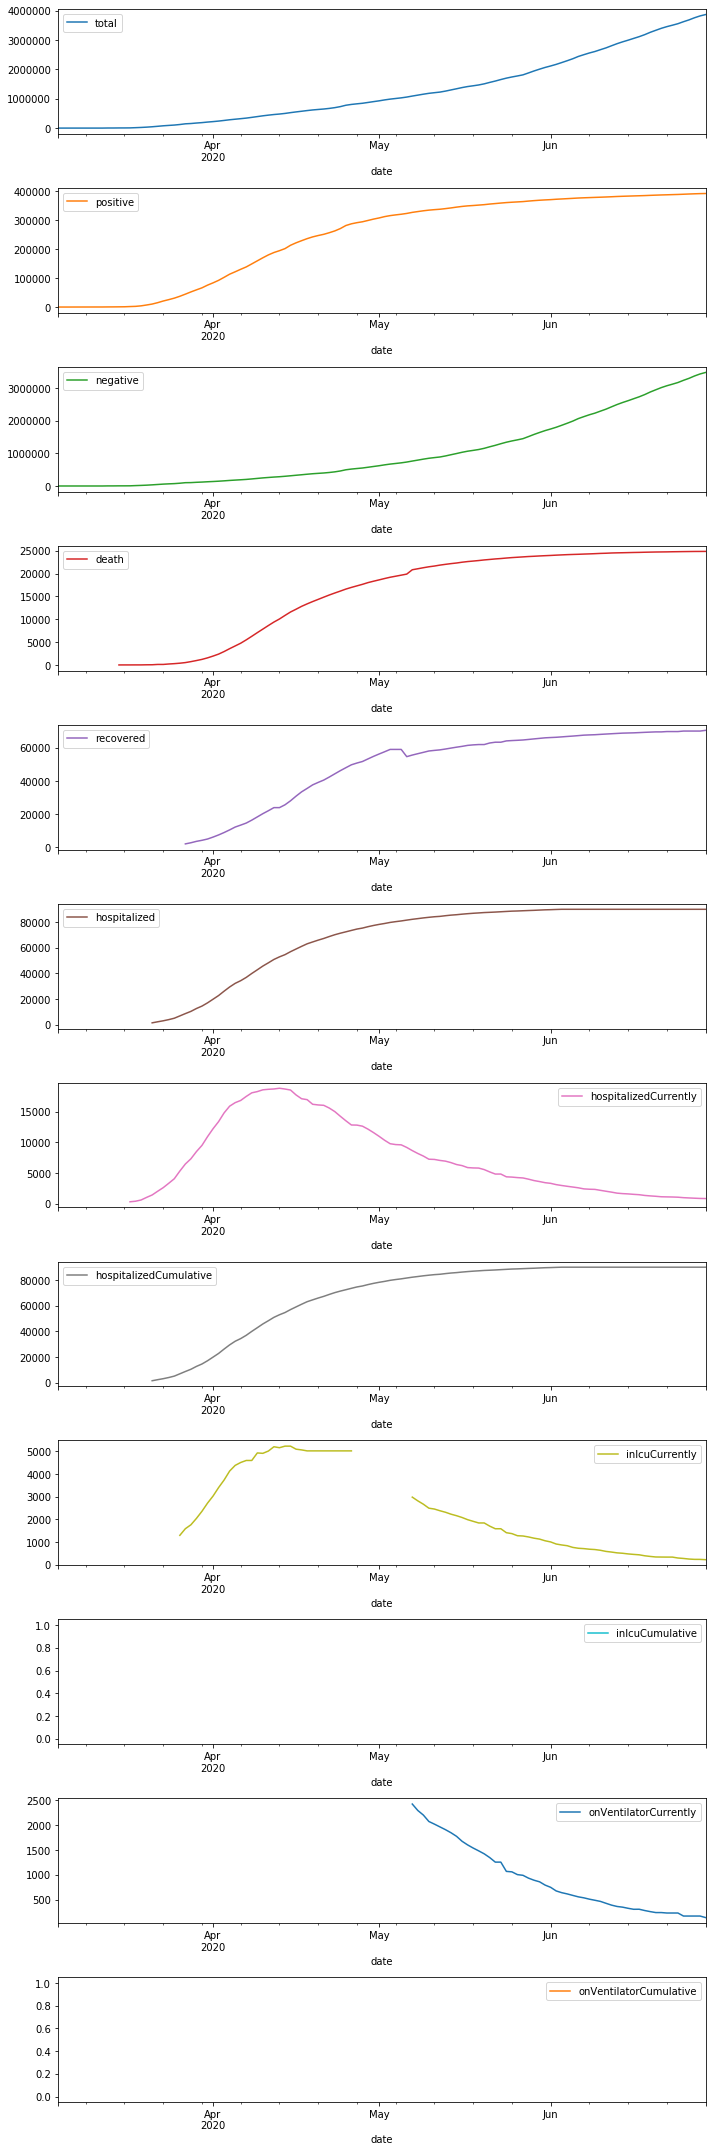

In [164]:
ny_ts = NY[columns_of_interest]
ny_ts.plot(subplots=True,figsize=(10,30),sharex=False);
plt.tight_layout()
# for state in state_list:

#     print(state)

In [100]:
# us_daily = tracking.data['us_daily']
# us_daily.head()

In [101]:
# states_daily=tracking.data['states_daily']
# states_daily.head()

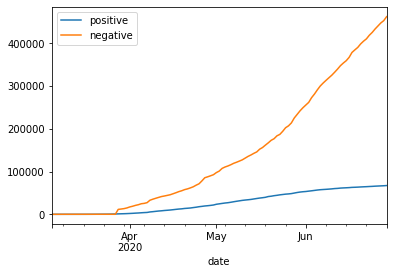

In [165]:
states_daily.groupby('state').get_group('MD')['positive'].plot(label='positive')
states_daily.groupby('state').get_group('MD')['negative'].plot(label='negative')
plt.gca().legend()

In [103]:
def get_csv_save_load(url, fpath):
    response = requests.get(url).content

    with open(fpath,'wb') as file:
        file.write(response)

    state_meta = pd.read_csv(fpath)
    print(f'File saved as {fpath}')
    
    return state_meta


In [104]:
# response = requests.get(base_url+url) 
# url_content = response.content


# with open('New Data/state_daily.csv', 'wb') as csv_file:
#     csv_file.write(url_content)
# # result = pd.DataFrame.from_records(json.loads(response.content))
# # result

In [105]:
us_daily.columns

Index(['date', 'states', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dateChecked', 'death', 'hospitalized', 'lastModified',
       'total', 'totalTestResults', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease', 'hash'],
      dtype='object')

Fields
date
Field type:integer
Date for which the daily totals were collected.

`dateChecked`
Field type:string
DateTime this data was entered into our database.

`death`
Field type:integer
Total number of people who have died as a result of COVID-19 so far.

Returns null if no data is available
deathIncrease
Field type:integer
Deprecated

Returns null if no data is available
hash
Field type:string
A hash for this record

hospitalized
Field type:integer
Deprecated

Returns null if no data is available
hospitalizedCumulative
Field type:integer
Total number of people who have gone to the hospital for COVID-19 so far, including those who have since recovered or died.

Returns null if no data is available
hospitalizedCurrently
Field type:integer
Number of people in hospital for COVID-19 on this day.

Returns null if no data is available
hospitalizedIncrease
Field type:integer
Deprecated

Returns null if no data is available
inIcuCumulative
Field type:integer
Total number of people who have gone to the ICU for COVID-19 so far, including those who have since recovered or died.

Returns null if no data is available
inIcuCurrently
Field type:integer
Total number of people in the ICU for COVID-19 on this day.

Returns null if no data is available
lastModified
Field type:string
Deprecated

negative
Field type:integer
Total number of people who have tested negative for COVID-19 so far.

Returns null if no data is available
negativeIncrease
Field type:integer
Deprecated

Returns null if no data is available
onVentilatorCumulative
Field type:integer
Total number of people who have used a ventilator for COVID-19 so far, including those who have since recovered or died.

Returns null if no data is available
onVentilatorCurrently
Field type:integer
Number of people using a ventilator for COVID-19 on this day.

Returns null if no data is available
pending
Field type:integer
Number of tests whose results have yet to be determined.

Returns null if no data is available
posNeg
Field type:integer
Deprecated

Returns null if no data is available
positive
Field type:integer
Total number of people who have tested positive for COVID-19 so far.

Returns null if no data is available
positiveIncrease
Field type:integer
Deprecated

Returns null if no data is available
recovered
Field type:integer
Total number of people who have recovered from COVID-19 so far.

Returns null if no data is available
states
Field type:integer
Number of states included in the data for this day.

total
Field type:integer
Deprecated

Returns null if no data is available
totalTestResults
Field type:integer
Deprecated

Returns null if no data is available
totalTestResultsIncrease
Field type:integer
Deprecated

Returns null if no data is available

In [106]:
import requests
def get_state_screenshots(state):
    url = f"http://covidtracking.com/api/v1/states/{state}/screenshots.csv"
    response = requests.get(url)
    if response.status_code==response.ok:
        return response
    else: 
        print(f'ERROR: status code = {response.status_code}')
        return response
    

In [107]:
## STATE METADATA
meta_url= "https://covidtracking.com/api/v1/states/info.csv"
response = requests.get(meta_url).content

csv_file = 'New Data/state_metadata.csv'
with open(csv_file,'wb') as file:
    file.write(response)
    
state_meta = pd.read_csv(csv_file)
state_meta

,state,notes,covid19Site,covid19SiteSecondary,covid19SiteTertiary,twitter,covid19SiteOld,name,fips,pui,pum
0,AK,Total tests are taken from the annotations on ...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,https://alaska-dhss.maps.arcgis.com/apps/opsda...,@Alaska_DHSS,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,Alaska,2,NaN,False
1,AL,Negatives = (Totals - Positives) \nPositives o...,https://alpublichealth.maps.arcgis.com/apps/op...,https://dph1.adph.state.al.us/covid-19/,NaN,@alpublichealth,http://www.alabamapublichealth.gov/infectiousd...,Alabama,1,NaN,False
2,AR,NaN,https://www.healthy.arkansas.gov/programs-serv...,https://adem.maps.arcgis.com/apps/opsdashboard...,NaN,@adhpio,https://www.healthy.arkansas.gov/programs-serv...,Arkansas,5,NaN,False
3,AS,Our data comes from a press release [from 5/1]...,https://www.americansamoa.gov/covid-19-advisories,https://www.facebook.com/amsamgov/,NaN,NaN,http://www.samoagovt.ws/2020/03/ministry-of-he...,American Samoa,60,NaN,False
4,AZ,Dashboard now has a new tab that details total...,https://www.azdhs.gov/preparedness/epidemiolog...,https://tableau.azdhs.gov/views/Hospitalizatio...,https://tableau.azdhs.gov/views/ExternalEMReso...,@azdhs,https://www.azdhs.gov/preparedness/epidemiolog...,Arizona,4,NaN,False
5,CA,California has been inconsistent in its timing...,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...,https://www.cdph.ca.gov/Programs/OPA/Pages/New...,NaN,@CAPublicHealth,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...,California,6,NaN,False
6,CO,Negative = People Tested - Cases. Cases includ...,https://covid19.colorado.gov/case-data,https://covid19.colorado.gov/covid-19-data,https://covid19.colorado.gov/hospital-data,@cdphe,https://www.colorado.gov/pacific/cdphe/2019-no...,Colorado,8,NaN,False
7,CT,Negative = Total - Positive. \nPositives occa...,https://data.ct.gov/coronavirus,NaN,NaN,@ctdph,https://portal.ct.gov/Coronavirus,Connecticut,9,NaN,False
8,DC,Positive and Negative include both public and ...,https://coronavirus.dc.gov/page/coronavirus-su...,NaN,NaN,@_DCHealth,https://coronavirus.dc.gov/,District Of Columbia,11,NaN,False
9,DE,"As of April 27, Delaware is reporting people t...",https://dhss.delaware.gov/dhss/dph/epi/2019nov...,NaN,NaN,@Delaware_DHSS,https://dhss.delaware.gov/dhss/dph/epi/2019nov...,Delaware,10,NaN,False


In [ ]:
state_meta = get_csv_save_load(meta_url,'New Data/state_metadata.csv')
state_meta

In [ ]:
for state in state_meta['state'].unique():
    print(state)

In [ ]:
## Get state historical data
import requests
def get_state_screenshots(state):
    url = f"http://covidtracking.com/api/v1/states/{state}/screenshots.csv"
    response = requests.get(url)
    if response.status_code==response.ok:
        return response
    else: 
        print(f'ERROR: status code = {response.status_code}')
        return response
    

In [ ]:
get_csv_save_load(base_url +"/api/v1/states/daily.csv")

# PRIOR WORK - COUNTRY TIME SERIES

In [ ]:
stop

In [ ]:
# ## Get the column names from the file name
# def clean_name(x,split_on='_19_'):
#     name = x.split(split_on)[-1].replace('.csv','')
#     return name

# col_names = list(map(clean_name,ts_files))
# col_names

In [ ]:
# files_to_load = dict(zip(col_names,ts_files))
# files_to_load

In [ ]:
# deaths_df = pd.read_csv(files_to_load['deaths'])
# deaths_df

In [ ]:
# df_ts_us = deaths_df.groupby('Country/Region').get_group('US')
# df_ts_us

In [ ]:
# df_US = pd.melt(df_ts_us,id_vars=['Province/State','Country/Region','Lat','Long'], var_name='Day', value_name='Deaths')
# df_US

In [ ]:
TS = {}
for country in df.groupby('Country/Region').groups:
    ts_temp = df.groupby('Country/Region').get_group(country)
#     ts_temp.set_index('Day',inplace=True)
    TS[country] =ts_temp

In [ ]:
def get_country_ts(df, country,group_col='Country/Region',ts_col='Cases'):
    ts = df.groupby(group_col).get_group(country )
    ts.set_index('date',inplace=True)

    if ts_col is not None:
        return ts[ts_col]
    else:
        return tsx
usa = get_country_ts(df,'US')
usa




In [ ]:

usa.iloc[-10:]

In [ ]:
italy = get_country_ts(df,'Italy')
italy.plot()

In [ ]:
def get_country_cum_ts(df, group='US'):
    US = df.groupby('Country/Region').get_group(group)
    US.set_index('date',inplace=True)
    ts_us = US.drop(columns=['Province/State','Day','Country/Region'])['Cases'].cumsum()#.plot()
    return ts_us

In [ ]:
ts_it = get_country_cum_ts(df,'Italy')
ts_us = get_country_cum_ts(df,'US')
ts_ch = get_country_cum_ts(df,'China')
ts_ko = get_country_cum_ts(df,'Korea, South')
ts_it.plot(label='Italty')
ts_us.plot(label='US')
plt.legend()

In [ ]:
ts_it.head()

In [ ]:

# ts_df = pd.concat([ts_us,ts_it,ts_ch,ts_ko],axis=1)
# ts_df.plot(subplots=True)

In [ ]:
# US = df.groupby('Country/Region').get_group('US')
# US.set_index('date',inplace=True)
# ts_us = US.drop(columns=['Province/State','Day','Country/Region'])['Cases'].cumsum()#.plot()
# ts_us.plot()

In [ ]:
# IT = df.groupby('Country/Region').get_group('Italy')
# IT.set_index('date',inplace=True)
# ts_it = IT.drop(columns=['Province/State','Day','Country/Region'])['Cases'].cumsum()#.plot()

In [ ]:
# pd.concat

In [ ]:
ts_it.plot(label='Italy')
ts_us.plot(label='US')
# ts_ch.plot(label='China')
plt.legend()

In [ ]:
fig, ax = plt.subplots()
for country in TS:
    TS[country]['Cases'].cumsum().plot(label=country,ax=ax)

ax.legend(bbox_to_anchor=(1.1, 1.05))


# plt.legend()